Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
def gridsearch_bet_params(model_pipeline = None, params=[{}],
                          scoring='accuracy',
                      cv=5,X,Y,other_params):
    
    
    start_ = time.time()
    
    gs = GridSearchCV(model_pipeline,
                          param_grid=params, **other_params
                          )
    gs.fit(X, y)
    
    
    print('total_time taken :', time.time()-start_)
    
    return gs.best_params_

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      )
gs_knn.fit(X_train, y_train)
gs_knn.best_params_
Output:
{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
# find best model score
gs_knn.score(X_train, y_train)
Output:
0.84035137

Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV



#estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, 
#cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, 
#return_train_score=False

def RandomizedSearch_bet_params(model_pipeline = None, params=[{}],
                          scoring='accuracy',
                      cv=5,X,Y,other_params):
    
    
    start_ = time.time()
    
    rs = RandomizedSearchCV(model_pipeline,
                          param_distributions=params, **other_params
                          )
    rs.fit(X, y)
    
    
    print('total_time taken :', time.time()-start_)
    
    return rs.best_params_

In [1]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_
{'C': 2..., 'penalty': 'l1'}

In [ ]:
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

Basyian optimizer

In [26]:
!pip install scikit-optimize

     ------------------------------------ 100.3/100.3 KB 643.1 kB/s eta 0:00:00


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [27]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

boston = load_boston()
X, y = boston.data, boston.target
n_features = X.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))
#Optimize all the things!

In [28]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=2.8916'

In [29]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best parameters:
- max_depth=5
- learning_rate=0.206158
- max_features=10
- min_samples_split=100
- min_samples_leaf=1


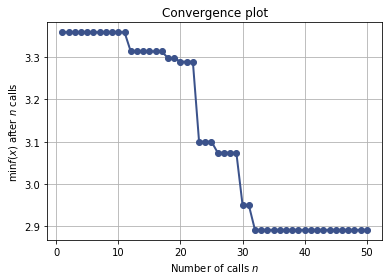

In [30]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)